In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
data=pd.read_csv("MovieGenre.csv",encoding='latin1')

In [120]:
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [23]:
data.tail()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
40103,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,Drama,https://images-na.ssl-images-amazon.com/images...
40104,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,Comedy,https://images-na.ssl-images-amazon.com/images...
40105,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,Horror,https://images-na.ssl-images-amazon.com/images...
40106,79142,http://www.imdb.com/title/tt79142,Xiao zi ming da (1979),6.5,Action|Comedy,https://images-na.ssl-images-amazon.com/images...
40107,70710,http://www.imdb.com/title/tt70710,Snatched (1973),6.5,Crime|Drama|Thriller,NaN


In [24]:
data.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
5,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...
6,114319,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
7,112302,http://www.imdb.com/title/tt112302,Tom and Huck (1995),5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
8,114576,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...
9,113189,http://www.imdb.com/title/tt113189,GoldenEye (1995),7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...


In [121]:
data.dtypes

imdbId          int64
Imdb Link      object
Title          object
IMDB Score    float64
Genre          object
Poster         object
dtype: object

In [122]:
data = data.drop(['Imdb Link', 'Title', 'Poster','IMDB Score'], axis=1)

In [123]:
data.head()

,imdbId,Genre
0,114709,Animation|Adventure|Comedy
1,113497,Action|Adventure|Family
2,113228,Comedy|Romance
3,114885,Comedy|Drama|Romance
4,113041,Comedy|Family|Romance


In [124]:
data = data.rename(columns={"imdbId": "Id"})

In [125]:
data.head()

,Id,Genre
0,114709,Animation|Adventure|Comedy
1,113497,Action|Adventure|Family
2,113228,Comedy|Romance
3,114885,Comedy|Drama|Romance
4,113041,Comedy|Family|Romance


In [126]:
data.count()

Id       40108
Genre    39963
dtype: int64

In [127]:
print(data.isnull().sum())

Id         0
Genre    145
dtype: int64


In [128]:
data = data.dropna() 
data.count()

Id       39963
Genre    39963
dtype: int64

In [129]:
print(data.isnull().sum())

Id       0
Genre    0
dtype: int64


In [130]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw
a= list();
for i in data.index:
    value =(data.Genre[i].split("|"))
    a.append(value)
with ChainedAssignent():
    data['newGenre']=a

In [131]:
data.head()

,Id,Genre,newGenre
0,114709,Animation|Adventure|Comedy,"[Animation, Adventure, Comedy]"
1,113497,Action|Adventure|Family,"[Action, Adventure, Family]"
2,113228,Comedy|Romance,"[Comedy, Romance]"
3,114885,Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,113041,Comedy|Family|Romance,"[Comedy, Family, Romance]"


In [132]:
data = data.drop(['Genre'], axis=1)

In [133]:
data = data.rename(columns={"newGenre": "Genre"})

In [134]:
data.head()

,Id,Genre
0,114709,"[Animation, Adventure, Comedy]"
1,113497,"[Action, Adventure, Family]"
2,113228,"[Comedy, Romance]"
3,114885,"[Comedy, Drama, Romance]"
4,113041,"[Comedy, Family, Romance]"


In [135]:
datasplit=data['Genre'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index').value
datasplit

index
0        Animation
1           Action
2           Comedy
3           Comedy
4           Comedy
           ...    
40098     Thriller
40099       Comedy
40100       Sci-Fi
40101     Thriller
40107     Thriller
Name: value, Length: 86225, dtype: object

In [136]:
dataunique=datasplit.unique()

In [137]:
dataunique

array(['Animation', 'Action', 'Comedy', 'Adventure', 'Biography', 'Crime',
       'Drama', 'Fantasy', 'Mystery', 'Romance', 'Sci-Fi', 'Documentary',
       'Family', 'Horror', 'Thriller', 'Musical', 'Short', 'Western',
       'Film-Noir', 'War', 'Music', 'Talk-Show', 'History', 'Adult',
       'Sport', 'News', 'Reality-TV', 'Game-Show'], dtype=object)

In [138]:
for i in dataunique:
    with ChainedAssignent():
        data[i]=0

In [139]:
data.head()

,Id,Genre,Animation,Action,Comedy,Adventure,Biography,Crime,Drama,Fantasy,...,Film-Noir,War,Music,Talk-Show,History,Adult,Sport,News,Reality-TV,Game-Show
0,114709,"[Animation, Adventure, Comedy]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,113497,"[Action, Adventure, Family]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113228,"[Comedy, Romance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114885,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,113041,"[Comedy, Family, Romance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
for i in data.index:
    for k in data.Genre[i]:
        for label in dataunique:
            if k==label:
                data.loc[[i],[label]]=1

In [141]:
data.head()

,Id,Genre,Animation,Action,Comedy,Adventure,Biography,Crime,Drama,Fantasy,...,Film-Noir,War,Music,Talk-Show,History,Adult,Sport,News,Reality-TV,Game-Show
0,114709,"[Animation, Adventure, Comedy]",1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,113497,"[Action, Adventure, Family]",0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113228,"[Comedy, Romance]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114885,"[Comedy, Drama, Romance]",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,113041,"[Comedy, Family, Romance]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
data.count()

Id             39963
Genre          39963
Animation      39963
Action         39963
Comedy         39963
Adventure      39963
Biography      39963
Crime          39963
Drama          39963
Fantasy        39963
Mystery        39963
Romance        39963
Sci-Fi         39963
Documentary    39963
Family         39963
Horror         39963
Thriller       39963
Musical        39963
Short          39963
Western        39963
Film-Noir      39963
War            39963
Music          39963
Talk-Show      39963
History        39963
Adult          39963
Sport          39963
News           39963
Reality-TV     39963
Game-Show      39963
dtype: int64

In [ ]:
data.to_csv("processed_data.csv")

In [150]:
sum_list=[]
for i in dataunique:
    sum_list.append(data[i].sum())
    

In [151]:
sum_list

[1750,
 5331,
 12682,
 3829,
 1999,
 5270,
 20053,
 2012,
 2395,
 6224,
 2020,
 3882,
 2100,
 3990,
 4816,
 845,
 1066,
 853,
 403,
 1173,
 1292,
 7,
 1426,
 14,
 707,
 83,
 2,
 1]

In [162]:
dv = pd.DataFrame({'Genre':dataunique,'Total':sum_list})
dv

,Genre,Total
0,Animation,1750
1,Action,5331
2,Comedy,12682
3,Adventure,3829
4,Biography,1999
5,Crime,5270
6,Drama,20053
7,Fantasy,2012
8,Mystery,2395
9,Romance,6224


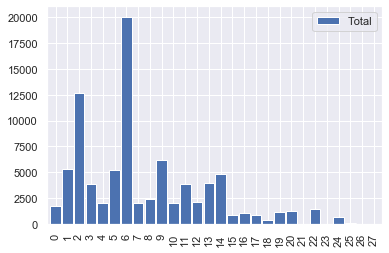

In [163]:
import matplotlib.pyplot as plt

dv[['Genre','Total']].plot(kind='bar', width=0.9)
plt.show()